# Matplotlib Challenge - 5 | Pymaceuticals Inc.

## Analysis
- After removing duplicate data, there were a total of 248 mice in this study. The gender difference is very minimal in the number of participants being 124 and 125.

- There is a strong positive correlation (0.84) between mouse weight and average tumor volume; as weight increases so does the average tumor volume.

- During the trial, the mice on Capomulin and Ramicane; had the lower average tumor volume; Ketapril and Naftisol had the highest average tumor average.

In [2]:
# dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from numpy import quantile
from pandas import Series

In [3]:
# Read CSV
mouseMetadata = pd.read_csv("Resources/Mouse_metadata.csv")
studyResults = pd.read_csv("Resources/Study_results.csv")

# Merge our two data frames together
fullData = pd.merge(mouseMetadata, studyResults, on="Mouse ID")
fullData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# checking the number of mice
miceCount = fullData["Mouse ID"].value_counts()
miceCount = len(miceCount)
miceCount

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
miceDuplicated = fullData.loc[fullData.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
miceDuplicated

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
miceDuplicated = fullData.loc[fullData["Mouse ID"] =="g989", :]
miceDuplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Clean DataFrame by dropping duplicate mice by IDs
cleanData = fullData[fullData["Mouse ID"] !="g989"]
cleanData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Verify the number of mice in the new Clean DataFrame
miceCountClean = cleanData["Mouse ID"].value_counts()
miceCountClean = len(miceCountClean)
miceCountClean

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = cleanData['Tumor Volume (mm3)'].groupby(cleanData['Drug Regimen']).mean()
median = cleanData['Tumor Volume (mm3)'].groupby(cleanData['Drug Regimen']).median()
var = cleanData['Tumor Volume (mm3)'].groupby(cleanData['Drug Regimen']).var()
std = cleanData['Tumor Volume (mm3)'].groupby(cleanData['Drug Regimen']).std()
sem = cleanData['Tumor Volume (mm3)'].groupby(cleanData['Drug Regimen']).sem()

summaryDataStats = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, 
"Tumor Volume Variance":var,"Tumor Volume Std. Dev.":std, "Tumor Volume Std. Err.":sem})

summaryDataStats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summaryDataAggregation =  cleanData.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summaryDataAggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar & Pie Charts

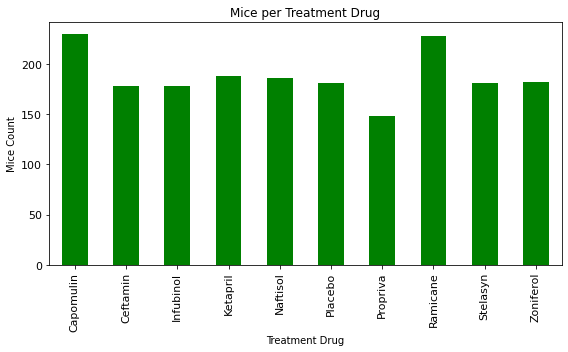

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
miceTreatmentCount = cleanData.groupby(["Drug Regimen"]).count()["Mouse ID"]
pandasBarPlot = miceTreatmentCount.plot(kind="bar", figsize=(8,5), color = 'g', fontsize = 11)
plt.xlabel("Treatment Drug")
plt.ylabel("Mice Count")
plt.title("Mice per Treatment Drug")
plt.tight_layout()
plt.show()

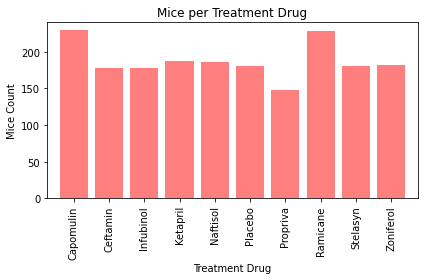

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(miceTreatmentCount))
y_axis = miceTreatmentCount = cleanData.groupby(["Drug Regimen"]).count()["Mouse ID"].tolist()
plt.bar(x_axis, y_axis, color ="r", alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xlim(-.75, len(x_axis)-0.25)
plt.ylim(0,max(miceTreatmentCount)+10)
plt.xticks(tick_locations,['Capomulin','Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation = 90)
plt.xlabel("Treatment Drug")
plt.ylabel("Mice Count")
plt.title("Mice per Treatment Drug")
plt.tight_layout()
plt.show()

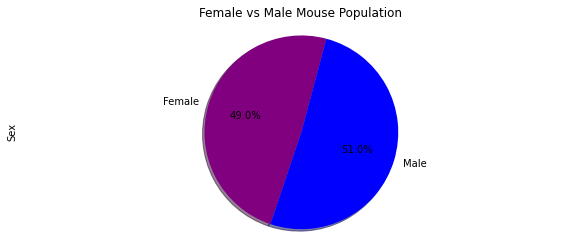

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.0, 51.0]
colors = ['purple', 'blue']
figure1, axis = plt.subplots(figsize=(10,4))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle = 75)
plt.title('Female vs Male Mouse Population')
plt.ylabel('Sex')
plt.axis("equal")
plt.show()    

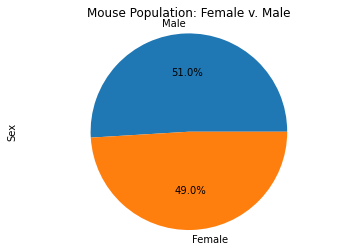

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderData = cleanData["Sex"].value_counts()
genderData.plot.pie(autopct="%1.1f%%")
plt.title('Mouse Population: Female v. Male')
plt.ylabel('Sex')
plt.axis("equal")
plt.show()

## Quartlies, Outliers, & BoxPlots

In [15]:
cleanData_df = pd.DataFrame(cleanData)
#cleanData_df.head()

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lastTimepoint = cleanData_df.groupby("Mouse ID")
lastTimepoint = lastTimepoint["Timepoint"].max()
lastTimepoint_df = pd.DataFrame(lastTimepoint)

tumorVolume_df = pd.merge(lastTimepoint, cleanData, on=["Mouse ID", "Timepoint"])
tumorVolume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatmentDrugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
capomulinTumorVolume = []
ramicaneTumorVolume = []
infubinolTumorVolume = []
ceftaminTumorVolume= []

for i in range(len(tumorVolume_df)-1):
    if tumorVolume_df.loc[i,"Drug Regimen"] == "Capomulin":
        capomulinTumorVolume.append(tumorVolume_df.loc[i, "Tumor Volume (mm3)"])
    if tumorVolume_df.loc[i,"Drug Regimen"] == "Ramicane":
        ramicaneTumorVolume.append(tumorVolume_df.loc[i, "Tumor Volume (mm3)"])
    if tumorVolume_df.loc[i,"Drug Regimen"] == "Infubinol":
        infubinolTumorVolume.append(tumorVolume_df.loc[i, "Tumor Volume (mm3)"])
    if tumorVolume_df.loc[i,"Drug Regimen"] == "Ceftamin":
        ceftaminTumorVolume.append(tumorVolume_df.loc[i, "Tumor Volume (mm3)"])

tumorVol = [capomulinTumorVolume, ramicaneTumorVolume, infubinolTumorVolume, ceftaminTumorVolume]

outlierList = []
for i in range(len(tumorVol)):
    quartiles=pd.Series(tumorVol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lowerBound = lowerq - (1.5 * iqr)
    upperBound = upperq + (1.5 * iqr)

    print(f"\n{treatmentDrugs[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}; upper quartile of tumor volume is: {upperq}.")
    print(f"Possible outliers could be values below {lowerBound} and values above {upperBound}.")
    
    for j in range(len(tumorVol[i])):
       if(tumorVol[i][j] < lowerBound) or (tumorVol[i][j] > upperBound):
           outlier = tumorVol[i][j]
           outlierList.append(outlier)
           print(f"Outliers are {outlierList}.")  



Capomulin:
The lower quartile of tumor volume is: 32.37735684; upper quartile of tumor volume is: 40.1592203.
Possible outliers could be values below 20.70456164999999 and values above 51.83201549.

Ramicane:
The lower quartile of tumor volume is: 31.56046955; upper quartile of tumor volume is: 40.65900627.
Possible outliers could be values below 17.912664470000003 and values above 54.30681135.

Infubinol:
The lower quartile of tumor volume is: 54.04860769; upper quartile of tumor volume is: 65.52574285.
Possible outliers could be values below 36.83290494999999 and values above 82.74144559000001.
Outliers are [36.321345799999996].

Ceftamin:
The lower quartile of tumor volume is: 48.72207785; upper quartile of tumor volume is: 64.29983003.
Possible outliers could be values below 25.355449580000002 and values above 87.66645829999999.


<function matplotlib.pyplot.show(*args, **kw)>

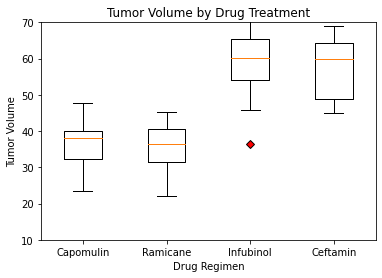

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
dotMarker = dict(markerfacecolor = "r", marker="D")
fig1, ax1 = plt.subplots()
plt.boxplot(tumorVol, labels = treatmentDrugs, flierprops = dotMarker)
plt.title("Tumor Volume by Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.ylim(10,70)
plt.show

## Line & Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (mouse L509)
tumorVolume_df.loc[tumorVolume_df["Drug Regimen"] == "Capomulin"].head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


In [20]:
mouseTumorl509 = fullData.loc[fullData["Mouse ID"] =="l509"]
mouseTumorl509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


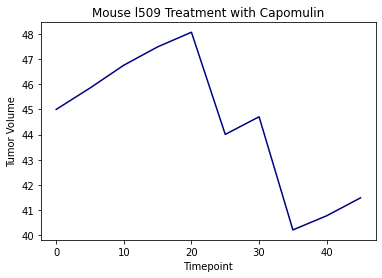

In [21]:
plt.plot(mouseTumorl509["Timepoint"], mouseTumorl509["Tumor Volume (mm3)"], color = "navy")
plt.title('Mouse l509 Treatment with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

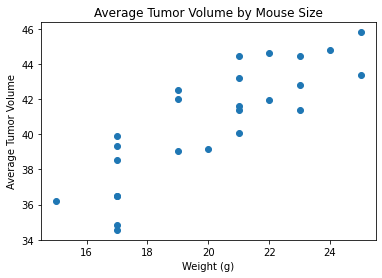

In [22]:
# Generate a scatter plot of aver,,age tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = fullData.loc[fullData["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
averageCapomulinVolume = capomulin_df["Tumor Volume (mm3)"].mean()
mouseWeight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouseWeight, averageCapomulinVolume)
plt.title('Average Tumor Volume by Mouse Size')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation & Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouseWeight = mouseWeight.astype(float)
correlate = st.pearsonr(mouseWeight, averageCapomulinVolume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlate[0], 2)}.")

The correlation between mouse weight and the average tumor volume is 0.84.


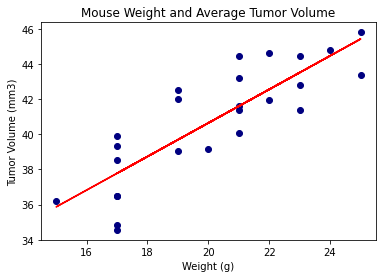

In [24]:
#Graph the data
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouseWeight, averageCapomulinVolume)
regressValues = mouseWeight * slope + intercept
lineEquation = "y = "+ str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(mouseWeight, averageCapomulinVolume, color="navy")
plt.plot(mouseWeight, regressValues, "r-")
plt.title('Mouse Weight and Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()